In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy as np

%matplotlib inline

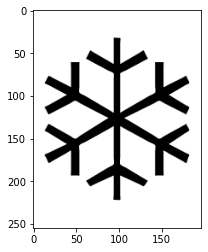

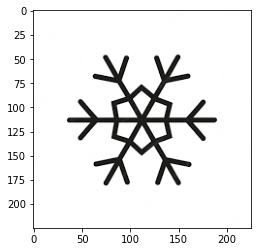

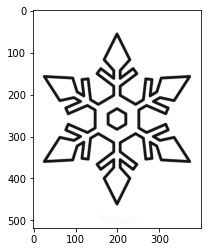

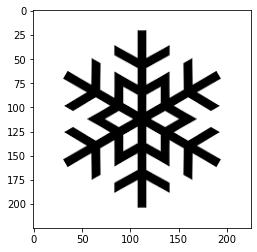

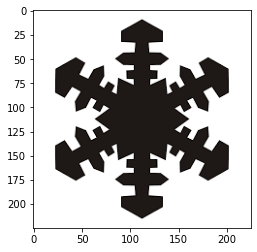

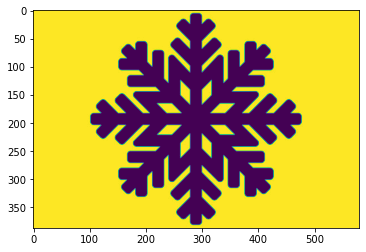

In [3]:
# Load Images
import glob
image_ls =[]
for image_path in glob.glob("images/*"):
    plt.figure()
    im = Image.open(image_path)
    if len(np.shape(im))==3:
        im= np.sum(im, 2)
    plt.imshow(im)
    image_ls.append(im)


385 414
400 400
253 312
400 400
400 400
319 222


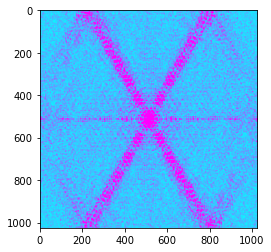

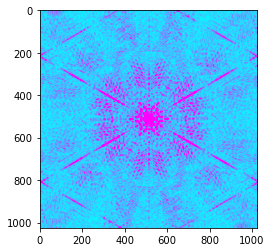

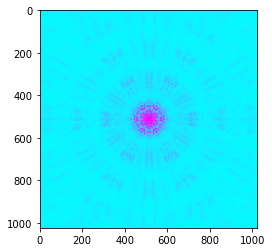

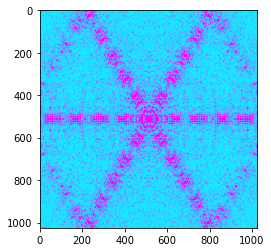

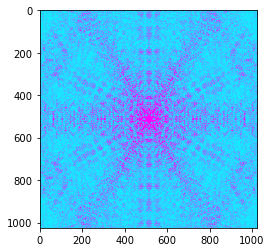

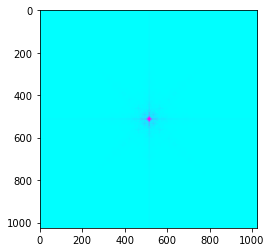

In [13]:
# FFT
f_im_ls = []
i=0
for im in image_ls:
    dims = np.shape(im)
    pad_x = int(np.ceil((1024-dims[0])/2))
    pad_y = int(np.ceil((1024-dims[1])/2))
    print( pad_x, pad_y)
    pad_im = np.pad(im, ((pad_x, pad_x),(pad_y, pad_y)), 'constant', constant_values=0)
    f_im =np.fft.fftshift( np.fft.fft2(pad_im))
    plt.figure()
    plt.imshow(np.abs(f_im), cmap="cool" )
    max_pix= np.max(np.max(np.abs(f_im)))
    min_pix = np.min(np.min(np.abs(f_im)))
    plt.clim(min_pix, max_pix/20)
    f_im_ls.append(f_im)
    plt.savefig(f'ffts/fft_{i}.png', )
    i= i+1

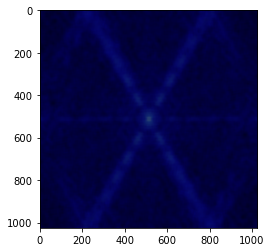

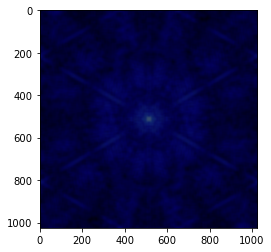

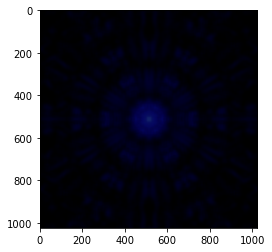

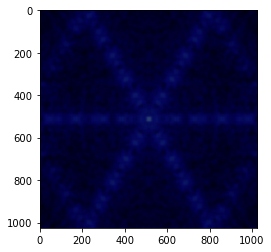

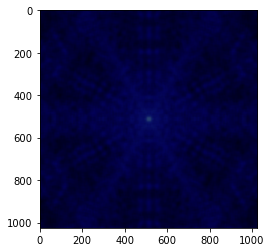

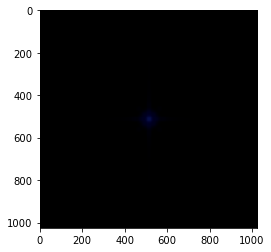

In [5]:
# Blur images
# to increase the blur increase the BOXBLUR
from PIL import Image, ImageFilter
from matplotlib import cm 

BOXBLUR=10
f_im_blur = []
for f_im in f_im_ls:
    im_abs = np.abs(f_im)
    max_pix = np.max(np.max(im_abs))
    im_abs = Image.fromarray(np.uint8(cm.gist_earth(im_abs/max_pix)*255))
    

    # Blur the input image using the filter ImageFilter.BLUR
    im_blurred = im_abs.filter(filter=ImageFilter.BoxBlur(BOXBLUR))
    plt.figure()
    plt.imshow(im_blurred)
    f_im_blur.append(im_blurred)


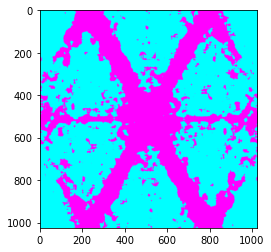

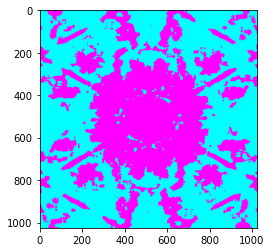

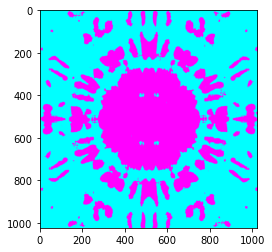

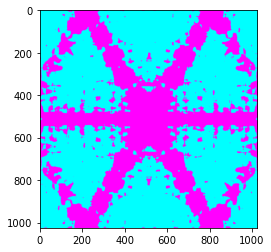

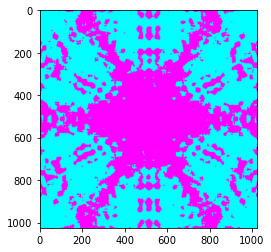

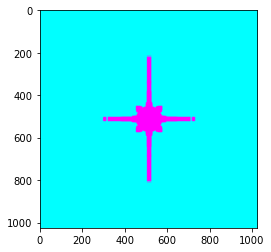

In [8]:
# make masks
# Pad real space apply circular mask and save
import matplotlib.image
i =0
f_mask_ls = []
for f_im in f_im_blur:
    #im_abs = np.abs(f_im)
    f_im = np.sum(f_im, 2)
    mean_pix_val = np.mean(np.mean(f_im))
    ind = f_im >= mean_pix_val
    ind1 = f_im < mean_pix_val
    f_im[ind]= 1
    f_im[ind1]= 0
    plt.figure()
    plt.imshow(f_im, cmap="cool")
    f_mask_ls = []
    matplotlib.image.imsave(f'masks/fft_mask_{i}.png', f_im)
    i = i+1

In [15]:
# Pad real space apply circular mask and save
import matplotlib.image

i=0 
for f_im in

    
    i= i+1

SyntaxError: invalid syntax (1283437952.py, line 5)